<a href="https://colab.research.google.com/github/andref03/diabetes-prediction/blob/main/Base_de_Dados_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação: Validação e Métricas**

## **Criando um modelo inicial**

Usarei dois modelos (para fins comparativos): árvore de decisão ou TreeClassifier; RandomForest.

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/diabetes.csv')

In [4]:
dados # visualização

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [6]:
dados.info() # visualização

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   glicemia              394 non-null    int64  
 1   pressao_sanguinea     394 non-null    int64  
 2   dobra_cutane_triceps  394 non-null    int64  
 3   insulina              394 non-null    float64
 4   imc                   394 non-null    float64
 5   diabetes              394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


### Separação de Variáveis

In [7]:
x = dados.drop('diabetes', axis = 1)
y = dados['diabetes']

In [8]:
x # visualização

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc
0,66,23,94,28.1,0.167
1,40,35,168,43.1,2.288
2,50,32,88,31.0,0.248
3,70,45,543,30.5,0.158
4,60,23,846,30.1,0.398
...,...,...,...,...,...
389,88,44,510,43.3,0.222
390,88,39,110,36.5,1.057
391,58,26,16,28.4,0.766
392,76,48,180,32.9,0.171


In [9]:
y # visualização

0      0
1      1
2      1
3      1
4      1
      ..
389    1
390    1
391    0
392    0
393    0
Name: diabetes, Length: 394, dtype: int64

## **Validação do Modelo**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.05, stratify = y)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, test_size = 0.25, stratify = y)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
modeloTree = DecisionTreeClassifier(max_depth = 3)
modeloTree.fit(x_treino, y_treino)
print(f'Acurácia de validação (TreeClassifier): {modeloTree.score(x_val, y_val)}')

Acurácia de validação (TreeClassifier): 0.7021276595744681


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
modeloForest = RandomForestClassifier(max_depth = 2)
modeloForest.fit(x_treino, y_treino)
print(f'Acurácia de validação (RandomForest): {modeloForest.score(x_val, y_val)}')

Acurácia de validação (RandomForest): 0.7127659574468085


## **Avaliando o modelo com a Matriz de Confusão**

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [25]:
y_previstoTree = modeloTree.predict(x_val)
y_previstoForest = modeloForest.predict(x_val)

In [26]:
matriz_confusaoTree = confusion_matrix(y_val, y_previstoTree)
matriz_confusaoForest = confusion_matrix(y_val, y_previstoForest)

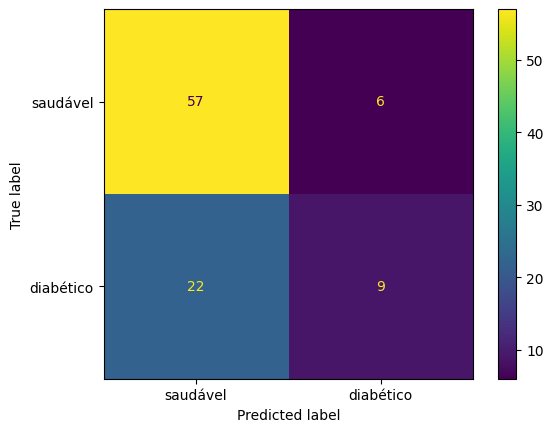

In [27]:
visualizaMatrizTree = ConfusionMatrixDisplay(confusion_matrix = matriz_confusaoTree, display_labels = ['saudável', 'diabético'])
visualizaMatrizTree.plot();

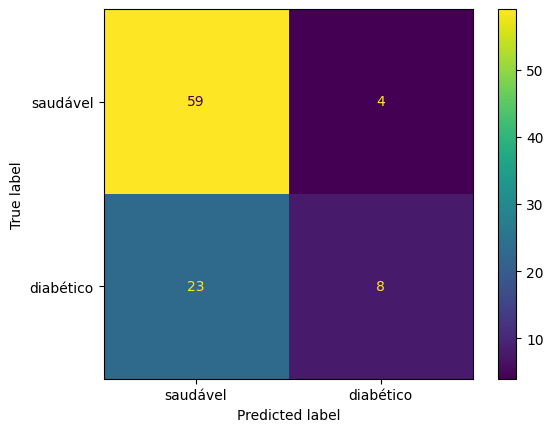

In [28]:
visualizaMatrizForest = ConfusionMatrixDisplay(confusion_matrix = matriz_confusaoForest, display_labels = ['saudável', 'diabético'])
visualizaMatrizForest.plot();

## **Métricas de avaliação: Acurácia, Precisão, Recall e F1-Score**

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print(f'Acurácia de validação (TreeClassifier): {accuracy_score(y_val, y_previstoTree)}')
print(f'Acurácia de validação (RandomForest):   {accuracy_score(y_val, y_previstoForest)}')

Acurácia de validação (TreeClassifier): 0.7021276595744681
Acurácia de validação (RandomForest):   0.7127659574468085


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [54]:
print(f'Precisão (TreeClassifier): {precision_score(y_val, y_previstoTree)}')
print(f'Recall   (TreeClassifier): {recall_score(y_val, y_previstoTree)}')
print(f'F1-Score (TreeClassifier): {f1_score(y_val, y_previstoTree)}')

Precisão (TreeClassifier): 0.6
Recall   (TreeClassifier): 0.2903225806451613
F1-Score (TreeClassifier): 0.3913043478260869


In [55]:
print(f'Precisão (RandomForest): {precision_score(y_val, y_previstoForest)}')
print(f'Recall   (RandomForest): {recall_score(y_val, y_previstoForest)}')
print(f'F1-Score (RandomForest): {f1_score(y_val, y_previstoForest)}')

Precisão (RandomForest): 0.6666666666666666
Recall   (RandomForest): 0.25806451612903225
F1-Score (RandomForest): 0.37209302325581395


## **Curva ROC**

Quanto mais próxima a curva estiver no **0.0 das abscissas** e **1.0 das ordenadas**, significa que melhor é nosso modelo. Caso contrário, se a curva se aproximar de uma diagonal, significa que pior é o nosso modelo.

In [61]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

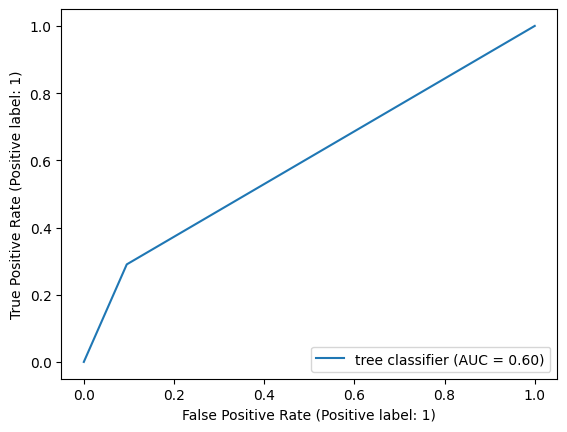

In [59]:
RocCurveDisplay.from_predictions(y_val, y_previstoTree, name = 'tree classifier');

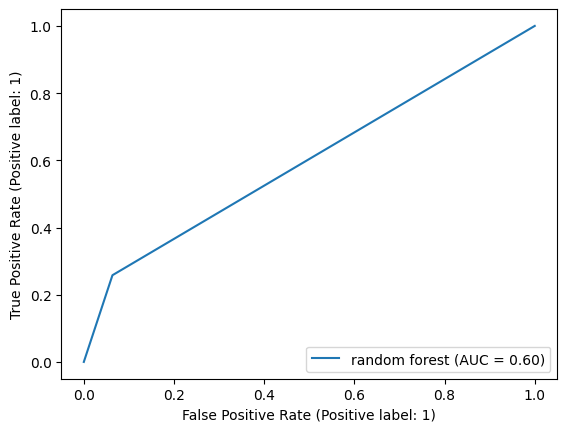

In [60]:
RocCurveDisplay.from_predictions(y_val, y_previstoForest, name = 'random forest');

In [62]:
print(f'AUC (TreeClassifier): {roc_auc_score(y_val, y_previstoTree)}')
print(f'AUC (RandomForest):   {roc_auc_score(y_val, y_previstoForest)}')

AUC (TreeClassifier): 0.5975422427035331
AUC (RandomForest):   0.5972862263184844


## **Curva de Precisão x Recall**

Quanto mais próximo da **coordenada (1.0, 1.0)**, significa que melhor é o nosso modelo. E quanto mais próximo da **coordenada (0.0, 0.0)**, significa que pior é o nosso modelo.

In [69]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

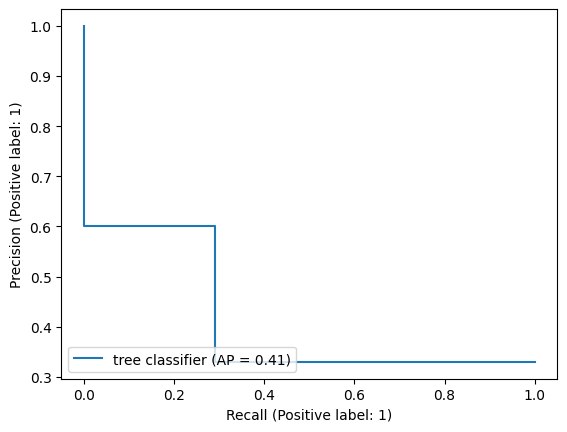

In [66]:
PrecisionRecallDisplay.from_predictions(y_val, y_previstoTree, name = 'tree classifier');

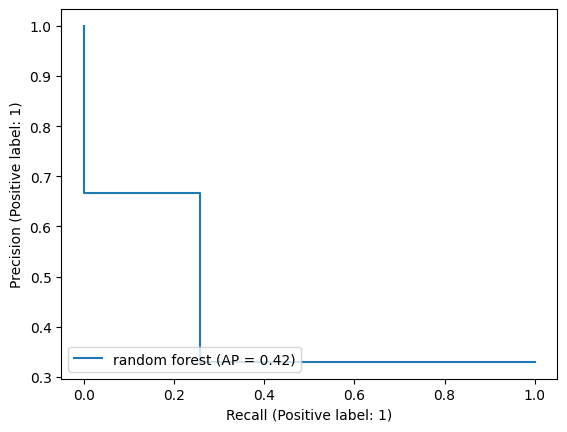

In [68]:
PrecisionRecallDisplay.from_predictions(y_val, y_previstoForest, name = 'random forest');

In [70]:
print(f'AP (TreeClassifier): {average_precision_score(y_val, y_previstoTree)}')
print(f'AP (RandomForest):   {average_precision_score(y_val, y_previstoForest)}')

AP (TreeClassifier): 0.40823610157858614
AP (RandomForest):   0.41672386181651794


## **Relatório de Métricas**

In [71]:
from sklearn.metrics import classification_report

In [76]:
print(f'Relatório de métricas para TreeClassifier:\n\n{classification_report(y_val, y_previstoTree)}')

Relatório de métricas para TreeClassifier:

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        63
           1       0.60      0.29      0.39        31

    accuracy                           0.70        94
   macro avg       0.66      0.60      0.60        94
weighted avg       0.68      0.70      0.67        94



In [75]:
print(f'Relatório de métricas para RandomForest:\n\n{classification_report(y_val, y_previstoForest)}')

Relatório de métricas para RandomForest:

              precision    recall  f1-score   support

           0       0.72      0.94      0.81        63
           1       0.67      0.26      0.37        31

    accuracy                           0.71        94
   macro avg       0.69      0.60      0.59        94
weighted avg       0.70      0.71      0.67        94

